Wskaźnik newsów - PKN Orlen
=========================

Notowanie
---------------

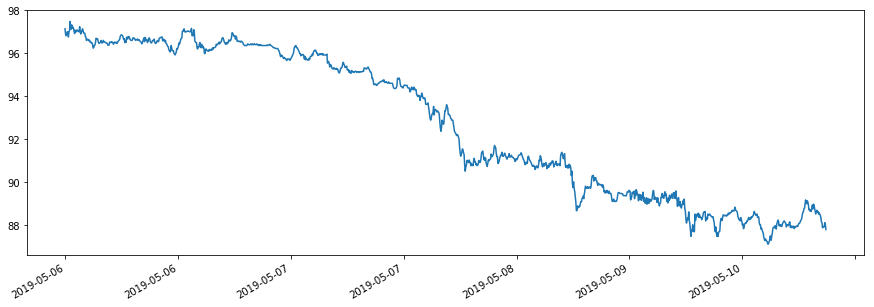

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('PKNORLEN','20190512')    
ph.plot(data)                        


Analiza Twittów
----------------------

In [2]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= { 'PKNORLEN' : {
                    'search': ['pkn orlen','ropa'] ,
                    'ignore':['bolid','smaczny','hot dog','medalistka','Lotta','kadet','bieg','sponsor',
                              'Duszyński','Małachowski','Wyciszkiewicz','Kszczot','Lisek','Kubica','Dąbrowskiego',
                              'RobertKubicaKlub','WilliamsRacing','Williams','AkademiiInwestowania'],
                    'sentiment':{
                        'kuluary':-1,
                        'wydać':-1,
                        'lepsza':1,
                        'tańszy':1
                        }
                    }
               }

twt =  twp.indicator('PKNORLEN','20190512')
for t in twt:
    if not t.ignore and t.power>10000 and t.sentiment==0:
        print('-------------------------------------')
        print(str(t.power)+' ' +str(t.date) +' ' + t.text)


-------------------------------------
11436 2019-05-12 13:12:43 Rt @ wjakobik : kuluar z prezes @ PKN_ORLEN @ DanielObajtek Na celownik @ BartSaw : ) https : //t.co/UXADbAJAdJ 
-------------------------------------
38249 2019-05-12 13:07:47 @ KikutAFC czyli zostawać tylko stacja @ PKN_ORLEN 
-------------------------------------
11186 2019-05-12 11:24:08 # Yokohama2019 : sztafeta mieszany 4 x 400 metr 5 . polski ( Przemysława Waściński , Małgorzata Hołub-Kowalik , Justyn Saganiak I Patryk Dobek ) 3:20.65 # PZLA100 # 100latPZLA @ PKN_ORLEN 
-------------------------------------
11922 2019-05-12 11:10:36 # Yokohama2019 : sztafeta mieszany 4 x 400 metr 5 . polski ( Przemysława Waściński , Małgorzata Hołub-Kowalik , Justyna… https : //t.co/I6c4DLeWBI 
-------------------------------------
25094 2019-05-12 10:46:53 hej @ PKN_ORLEN ten jakiś żreć ? ? ! ! ! Białystok , Ula . Ks . Suchowolca , wylot Na lublin . półka z gazeta I Nie Na pierw… https : //t.co/p1foTbJ4Iw 
-------------------------

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

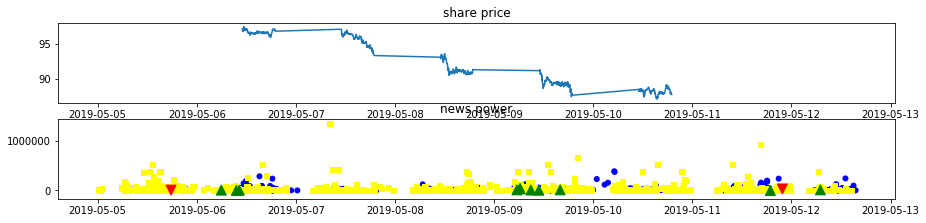

In [3]:
import plot_helper 
plot_helper.plot2(data,twt)